In [33]:
import os
import py7zr
from zipfile import ZipFile

In [4]:
!pip install py7zr

     |████████████████████████████████| 63 kB 1.2 MB/s eta 0:00:011
     |████████████████████████████████| 13.7 MB 9.3 MB/s eta 0:00:01


In [1]:
import os
cwd = os.getcwd()
print(cwd)

/home/saiteja_kandra


In [6]:
archive = py7zr.SevenZipFile(f"/home/saiteja_kandra/members_v3.csv.7z", mode='r')
archive.extractall(path='/home/saiteja_kandra')

In [46]:
import pandas as pd
members_v3=pd.read_csv('/home/saiteja_kandra/members_v3.csv')

In [47]:
members_v3.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [9]:
members_v3.shape

(6769473, 6)

members.csv file-- it contains the user information, but not every user

In [48]:
members_v3=members_v3.drop(['gender'],axis=1)
members_v3.head()

,msno,city,bd,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,9,20110915


In [12]:
archive = py7zr.SevenZipFile(f"/home/saiteja_kandra/train_v2.csv.7z", mode='r')
archive.extractall(path='/home/saiteja_kandra')

In [14]:
train = pd.read_csv('/home/saiteja_kandra/data/churn_comp_refresh/train_v2.csv')
train.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [15]:
train.is_churn.value_counts()

0    883630
1     87330
Name: is_churn, dtype: int64

In [16]:
archive = py7zr.SevenZipFile(f"/home/saiteja_kandra/transactions_v2.csv.7z", mode='r')
archive.extractall(path='/home/saiteja_kandra')

In [41]:
import pandas as pd
transactions_data=pd.read_csv('/home/saiteja_kandra/data/churn_comp_refresh/transactions_v2.csv')
transactions_data.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


In [18]:
transactions_data.is_auto_renew.value_counts()

1    1123775
0     307234
Name: is_auto_renew, dtype: int64

In [42]:
# sorting all rows by 'transaction_date' in descending order
transactions_data = transactions_data.sort_values(by='transaction_date',ascending=False)
# dropping duplicates if there are any
transactions_data.drop_duplicates(inplace=True)
print("Shape of transactions dataframe after dropping duplicates = ",transactions_data.shape)

Shape of transactions dataframe after dropping duplicates =  (1431009, 9)


In [20]:
archive = py7zr.SevenZipFile(f"/home/saiteja_kandra/user_logs_v2.csv.7z", mode='r')
archive.extractall(path='/home/saiteja_kandra')

In [51]:
import pandas as pd
logs_data = pd.read_csv('/home/saiteja_kandra/data/churn_comp_refresh/user_logs_v2.csv')
logs_data.head()


,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


***Feature engineering***

In [22]:
#count number of transactions per user
transaction_count_per_user = transactions_data.groupby('msno')['msno'].count()
len(transaction_count_per_user)
transaction_count_per_user.head()

msno
+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=    1
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=    1
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=    2
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=    1
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=    1
Name: msno, dtype: int64

In [23]:

transaction_count_df = pd.DataFrame(transaction_count_per_user)
transaction_count_df.columns =['transaction_count'] #adding the column
transaction_count_df.reset_index(inplace=True) # this will set the index properly
transaction_count_df.head()

,msno,transaction_count
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,1
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,2
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,1


In [24]:
transactions_data= transaction_count_df.merge(transactions_data,on='msno')
transactions_data.head()

,msno,transaction_count,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,1,22,395,1599,1599,0,20161023,20180206,0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1,41,30,99,99,1,20170315,20170415,0
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,2,39,30,149,149,1,20170331,20170519,0
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,2,39,30,149,149,1,20170228,20170419,0
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1,41,30,149,149,1,20170326,20170426,0


In [25]:
transactions_data.shape

(1431009, 10)

#as you can see that seconds column has very high value, try to covert it to minutes value

In [52]:
logs_data['total_minutes'] =logs_data['total_secs']/60
logs_data.drop(columns=['total_secs'],inplace=True)
logs_data.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_minutes
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,105.154550
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,39.844983
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,386.722283
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,118.340900
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,473.359300


In [53]:
#taking sum of each user and on each feature
user_logs_sum = logs_data.groupby('msno',as_index=False).sum()
user_logs_sum.drop(columns=['date'],axis=1,inplace=True)
user_logs_sum.head()

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_minutes
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,86,11,10,5,472,530,1965.123750
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,191,90,75,144,589,885,3208.798200
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43,12,15,12,485,468,1923.521000
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,207,163,100,64,436,828,2498.275967
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,105,24,39,35,479,230,1940.554117


In [54]:
#taking mean of each user and on each feature
user_logs_mean = logs_data.groupby('msno',as_index=False).mean()
user_logs_mean.drop(columns=['date'],axis=1,inplace=True)
user_logs_mean.head()

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_minutes
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,3.307692,0.423077,0.384615,0.192308,18.153846,20.384615,75.581683
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,6.161290,2.903226,2.419355,4.645161,19.000000,28.548387,103.509619
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1.535714,0.428571,0.535714,0.428571,17.321429,16.714286,68.697179
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,9.857143,7.761905,4.761905,3.047619,20.761905,39.428571,118.965522
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,3.620690,0.827586,1.344828,1.206897,16.517241,7.931034,66.915659


In [55]:
user_logs_mean.columns=['msno','mean_num_25','mean_num_50','mean_num_75','mean_num_985','mean_num_100','mean_num_unq','mean_total_min']
user_logs_mean.head()

,msno,mean_num_25,mean_num_50,mean_num_75,mean_num_985,mean_num_100,mean_num_unq,mean_total_min
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,3.307692,0.423077,0.384615,0.192308,18.153846,20.384615,75.581683
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,6.161290,2.903226,2.419355,4.645161,19.000000,28.548387,103.509619
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1.535714,0.428571,0.535714,0.428571,17.321429,16.714286,68.697179
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,9.857143,7.761905,4.761905,3.047619,20.761905,39.428571,118.965522
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,3.620690,0.827586,1.344828,1.206897,16.517241,7.931034,66.915659


In [56]:
final_logs_data = user_logs_mean.merge(user_logs_sum, on='msno')
final_logs_data.head()

,msno,mean_num_25,mean_num_50,mean_num_75,mean_num_985,mean_num_100,mean_num_unq,mean_total_min,num_25,num_50,num_75,num_985,num_100,num_unq,total_minutes
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,3.307692,0.423077,0.384615,0.192308,18.153846,20.384615,75.581683,86,11,10,5,472,530,1965.123750
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,6.161290,2.903226,2.419355,4.645161,19.000000,28.548387,103.509619,191,90,75,144,589,885,3208.798200
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1.535714,0.428571,0.535714,0.428571,17.321429,16.714286,68.697179,43,12,15,12,485,468,1923.521000
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,9.857143,7.761905,4.761905,3.047619,20.761905,39.428571,118.965522,207,163,100,64,436,828,2498.275967
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,3.620690,0.827586,1.344828,1.206897,16.517241,7.931034,66.915659,105,24,39,35,479,230,1940.554117


In [57]:
final_logs_data.shape

(1103894, 15)

In [32]:
transactions = train.merge(transactions_data, how='left',on='msno')


In [33]:
transactions.shape

(1169418, 11)

In [34]:
members   =    transactions.merge(members_v3,how='left',on='msno')
train_data=    members.merge(final_logs_data,how='left', on='msno')
train_data.head()

,msno,is_churn,transaction_count,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,...,mean_num_100,mean_num_unq,mean_total_min,num_25,num_50,num_75,num_985,num_100,num_unq,total_minutes
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.909091,31.636364,122.119026,186.0,23.0,13.0,10.0,318.0,348.0,1343.309283
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,1.0,36.0,30.0,180.0,180.0,0.0,20170311.0,20170411.0,...,4.333333,5.000000,19.406969,0.0,4.0,2.0,0.0,26.0,30.0,116.441817
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,2.0,15.0,90.0,300.0,300.0,0.0,20170314.0,20170615.0,...,10.250000,21.600000,56.508722,239.0,57.0,32.0,22.0,205.0,432.0,1130.174450
3,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,2.0,17.0,60.0,0.0,0.0,0.0,20170311.0,20170314.0,...,10.250000,21.600000,56.508722,239.0,57.0,32.0,22.0,205.0,432.0,1130.174450
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,10.0,41.0,30.0,149.0,149.0,1.0,20151208.0,20180108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
train_data.is_churn.value_counts()

0    1026410
1     143008
Name: is_churn, dtype: int64

In [36]:

train_data.shape

(1169418, 29)

In [36]:
#remove the duplicates if any
train_data= train_data.drop_duplicates(subset= ['msno'], keep='first')
train_data.shape

(970960, 29)

In [37]:
train_data.isna().sum()/train_data.shape[0]

msno                      0.000000
is_churn                  0.000000
transaction_count         0.038500
payment_method_id         0.038500
payment_plan_days         0.038500
plan_list_price           0.038500
actual_amount_paid        0.038500
is_auto_renew             0.038500
transaction_date          0.038500
membership_expire_date    0.038500
is_cancel                 0.038500
city                      0.113283
bd                        0.113283
registered_via            0.113283
registration_init_time    0.113283
mean_num_25               0.222881
mean_num_50               0.222881
mean_num_75               0.222881
mean_num_985              0.222881
mean_num_100              0.222881
mean_num_unq              0.222881
mean_total_min            0.222881
num_25                    0.222881
num_50                    0.222881
num_75                    0.222881
num_985                   0.222881
num_100                   0.222881
num_unq                   0.222881
total_minutes       

In [12]:
# taking features names to fill missing values with median and mode
numerical_columns = ['payment_plan_days','plan_list_price','num_25', 
                     'num_50', 'num_75', 'num_985', 'num_100','num_unq', 
                     'total_minutes', 'mean_num_25','mean_num_50','mean_num_75',
                     'mean_num_985','mean_num_100','mean_num_unq', 'mean_total_min','bd','transaction_count','actual_amount_paid','price_per_day']
    
categorical_columns =['payment_method_id','is_auto_renew','city',
                      'registered_via','transaction_date','registration_init_time','is_cancel','membership_expire_date']

In [13]:
def median(data,numerical_columns):
    
    median_dict= dict()
    for column in numerical_columns:
        median_dict[column]= np.nanmedian(data[column])
    return median_dict

In [14]:
def mode(data,categorical_columns):
    mode_dict =dict()
    for column in categorical_columns:
        mode_dict[column] = data[column].value_counts().index[0]
    return mode_dict


In [15]:
import numpy as np
median_data = median(train_data,numerical_columns)
mode_data= mode(train_data,categorical_columns)

In [ ]:
print(mode_data)

{'payment_method_id': 41.0, 'is_auto_renew': 1.0, 'city': 1.0, 'registered_via': 7.0, 'transaction_date': 20170331.0, 'registration_init_time': 20151009.0, 'is_cancel': 0.0, 'membership_expire_date': 20170430.0}


In [16]:
#fill the missing values
for column in numerical_columns:
    train_data[column].fillna(median_data[column],inplace=True)
for column in categorical_columns:
    train_data[column].fillna(mode_data[column],inplace=True)

In [17]:
train_data.isna().sum()

msno                      0
is_churn                  0
transaction_count         0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
city                      0
bd                        0
registered_via            0
registration_init_time    0
mean_num_25               0
mean_num_50               0
mean_num_75               0
mean_num_985              0
mean_num_100              0
mean_num_unq              0
mean_total_min            0
num_25                    0
num_50                    0
num_75                    0
num_985                   0
num_100                   0
num_unq                   0
total_minutes             0
day_of_month              0
transaction_month         0
dayofweek                 0
trans_is_weekend          0
trans_month_day           0
registration_day          0
registration_month  

#Now there are no null values, we can proceed furthur

EDA on all features, with respect to churn and no churn users

In [45]:
train_data.head()

,msno,is_churn,transaction_count,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,city,bd,registered_via,registration_init_time,mean_num_25,mean_num_50,mean_num_75,mean_num_985,mean_num_100,mean_num_unq,mean_total_min,num_25,num_50,num_75,num_985,num_100,num_unq,total_minutes
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,1.0,41.0,30.0,149.0,149.0,1.0,20170331.0,20170430.0,0.0,5.0,28.0,3.0,20131223.0,16.909091,2.090909,1.181818,0.909091,28.909091,31.636364,122.119026,186.0,23.0,13.0,10.0,318.0,348.0,1343.309283
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,1.0,36.0,30.0,180.0,180.0,0.0,20170311.0,20170411.0,0.0,13.0,20.0,3.0,20131223.0,0.000000,0.666667,0.333333,0.000000,4.333333,5.000000,19.406969,0.0,4.0,2.0,0.0,26.0,30.0,116.441817
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,2.0,15.0,90.0,300.0,300.0,0.0,20170314.0,20170615.0,0.0,13.0,18.0,3.0,20131227.0,11.950000,2.850000,1.600000,1.100000,10.250000,21.600000,56.508722,239.0,57.0,32.0,22.0,205.0,432.0,1130.174450
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,10.0,41.0,30.0,149.0,149.0,1.0,20151208.0,20180108.0,0.0,1.0,0.0,7.0,20140109.0,3.454545,0.888889,0.600000,0.608696,17.454545,19.233333,78.483853,55.0,14.0,10.0,10.0,305.0,330.0,1377.337333
14,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,8.0,41.0,30.0,99.0,99.0,1.0,20170316.0,20170918.0,0.0,13.0,35.0,7.0,20140125.0,0.600000,0.466667,0.266667,0.266667,64.133333,36.533333,266.535823,9.0,7.0,4.0,4.0,962.0,548.0,3998.037350


In [35]:
train_data.shape

(970960, 29)

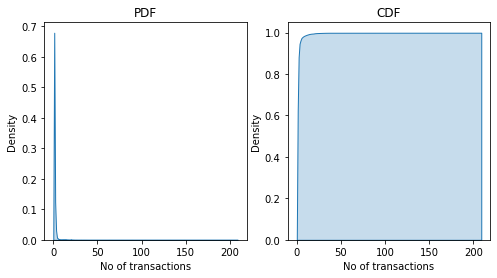

In [48]:
# kde plot of number of transactions of chunred users
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=plt.figaspect(.5))
ax1 = plt.subplot(121)
sns.kdeplot(train_data[train_data.is_churn==1]['transaction_count'], shade=True, ax=ax1)
plt.xlabel('No of transactions')
plt.title("PDF")
ax2 = plt.subplot(122)
sns.kdeplot(train_data[train_data.is_churn==1]['transaction_count'], shade=True, cumulative=True, ax=ax2)
#cdf(no_of_rated_movies_per_user)
plt.xlabel('No of transactions')
plt.title('CDF')
plt.show()

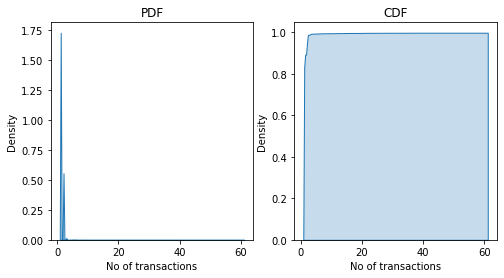

In [49]:
# kde plot of number of transactions of not churned users
import matplotlib.pyplot as plt
fig = plt.figure(figsize=plt.figaspect(.5))
ax1 = plt.subplot(121)
sns.kdeplot(train_data[train_data.is_churn==0]['transaction_count'], shade=True, ax=ax1)
plt.xlabel('No of transactions')
plt.title("PDF")
ax2 = plt.subplot(122)
sns.kdeplot(train_data[train_data.is_churn==0]['transaction_count'], shade=True, cumulative=True, ax=ax2)
#cdf(no_of_rated_movies_per_user)
plt.xlabel('No of transactions')
plt.title('CDF')
plt.show()

From the above there is a very clear separation between the churn and non churn users when the number of transactions differ.

also see that for the churn users most of the users are having less than 50 transactions, but in the non churn users, there we're having the very less around less than 4 number of transactions.



Creating new features using the transaction date, means I'm creating? because see there is lot of sepration between the churn and non churn users based on the transactions

In [44]:
#int is not iterable, so we're converting to str and then again back to int
#20131223
from datetime import datetime
train_data['day_of_month']=train_data.transaction_date.apply(lambda x:
                    np.int8(str(int(x))[6:]))

train_data['transaction_month'] =train_data.transaction_date.apply(lambda x: np.int8(str(int(x))[4:6]))

train_data['dayofweek'] =train_data.transaction_date.apply(lambda x: datetime.strptime(str(int(x)), "%Y%m%d").isoweekday())

train_data['trans_is_weekend'] = train_data.dayofweek.map(lambda x:1 if x in (6,7) else 0)
train_data['trans_month_day'] = train_data.transaction_date.apply(lambda x: np.int16(str(int(x))[4:]))

Registration_date features same as like above

In [45]:
train_data['registration_day']=train_data.registration_init_time.apply(lambda x: np.int8(str(int(x))[6:] ))
train_data['registration_month']=train_data.registration_init_time.apply(lambda x: np.int8(str(int(x))[4:6]))
train_data['registration_day_month']=train_data.registration_init_time.apply(lambda x: np.int16(str(int(x))[4:]))
train_data['registration_day_num'] =train_data.registration_init_time.apply(lambda x:datetime.strptime(str(int(x)), "%Y%m%d").isoweekday())
train_data['registration_weekend']=train_data.registration_day_num.map(lambda x: 1 if x in (6,7) else 0)
train_data['price_per_day'] = train_data['plan_list_price']/train_data['payment_plan_days']

In [38]:
import pandas as pd
train_data.to_pickle('/home/saiteja_kandra/final_train_data.pkl')

In [39]:
train_data= pd.read_pickle('/home/saiteja_kandra/final_train_data.pkl')

In [46]:
#creating ratio features i.e number of songs that are 25% of their length  out of total number of songs listened
# creating a feature 'total_num' i.e. total number of songs listened by the user
train_data['min_per_song'] = train_data['total_minutes']/(train_data['num_25']+train_data['num_50']+train_data['num_75']+train_data['num_985']+train_data['num_100'])
train_data['total_num'] = train_data['num_25']+train_data['num_50']+train_data['num_75']+train_data['num_985']+train_data['num_100']
train_data['num_25_ratio'] = train_data['num_25']/train_data['total_num']
train_data['num_50_ratio'] = train_data['num_50']/train_data['total_num']
train_data['num_75_ratio'] = train_data['num_75']/train_data['total_num']
train_data['num_985_ratio'] =train_data['num_985']/train_data['total_num']
train_data['num_100_ratio'] =train_data['num_100']/train_data['total_num']
train_data['avg_min_per_unq'] = train_data['mean_total_min']/train_data['mean_num_unq']
train_data['total_by_unq'] = train_data['total_num']/train_data['num_unq']

In [47]:
train_data.shape

(970960, 49)

In [18]:
train_data.to_pickle('/home/saiteja_kandra/final_data_49.pkl')

In [3]:
import pandas as pd
train_data= pd.read_pickle('/home/saiteja_kandra/final_data_49.pkl')

In [4]:
train_data.shape

(970960, 49)

# implementing the ensemble model

# Step 1 --splitting 80 -20

In [5]:
# splitting data into train and test set 
X = train_data.drop(columns=['msno','is_churn','transaction_date','registration_init_time'],axis=1)
print(X.shape)
y = train_data['is_churn']
print(y.shape)
# splitting data into train and test sets 
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte = train_test_split(X,y,test_size=0.20,stratify=y)
print("Shape of train = ",xtr.shape,ytr.shape)
print("Shape of test = ",xte.shape,yte.shape)

(970960, 45)
(970960,)
Shape of train =  (776768, 45) (776768,)
Shape of test =  (194192, 45) (194192,)


# implementing custom ensemble model 

In [23]:
from sklearn.utils import resample
from sklearn import tree

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


def custom_ensemble(X_train,y_train,X_test, n_estimators):
    
    ''' takes training,testing and n_estimators returns X_test predictions '''
    
    models=[]
    D_meta=pd.DataFrame()
    D_test_meta =pd.DataFrame()
    
    D1_xtr,D2_xte,D1_ytr,D2_yte = train_test_split(X_train,y_train,test_size=0.50,stratify=y_train)
    
    
    for k in range(n_estimators): #taking 500 as the base models
    
        X_new, y_new = resample(D1_xtr, D1_ytr,n_samples=20000 ,stratify=D1_ytr)
        
        classifier=tree.DecisionTreeClassifier()
        
        models.append(classifier.fit(X_new,y_new)) #training each base model and storing it into models for later use
        current_model=models[k]
        predictions= current_model.predict(D2_xte) # step 4 predictions of models
        D_meta.insert(loc=k, column=k, value=predictions) # creating the predictions dataFrame
        
    ''' hyperparameter tuning for number of base models'''
    
    xgb = XGBClassifier()
    Hyperparameters=[{"n_estimators":[100,200,500]}]
    algo=RandomizedSearchCV(xgb,Hyperparameters,verbose=1,cv=3)
    xbgoost=algo.fit(D_meta,D2_yte)
    
    
    for i in range(n_estimators):
        
        predictions_test=models[i].predict(X_test) #predicting 20% test data with each base model 
        D_test_meta.insert(loc=i, column=i, value=predictions_test) # storing it into new dataframe
        
    pred_final = xbgoost.predict(D_test_meta) # predicting with final meta model
    return pred_final

In [16]:
final_predictions = custom_ensemble(xtr,ytr,xte,500)
from sklearn.metrics import log_loss
log_loss(final_predictions,yte)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 87.6min finished


0.9049567997231189

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(final_predictions,yte)

0.9737991266375546

# Logistic regression

In [22]:
parameters=[{"C":[10**-4,10**-2,10**0,10**2,10**4]}]
logisticregression=LogisticRegression()
algo=GridSearchCV(logisticregression,parameters,scoring="neg_log_loss",return_train_score=True
, n_jobs=-1, verbose=1,cv=3)
algo.fit(xtr,ytr)
print(algo.best_estimator_)
print(algo.score(xte, yte))


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   23.1s finished


LogisticRegression(C=0.01)
-0.30241670811920196


In [24]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
classifier=LogisticRegression(C=0.01)
calibrated = CalibratedClassifierCV(classifier, method='sigmoid')
calibrated.fit(xtr,ytr)
# predict probabilities
probs = calibrated.predict_proba(xte)

probs_train=calibrated.predict_proba(xtr)

In [25]:
# accuracy on train and test dataset
from sklearn.metrics import accuracy_score, log_loss
ytr_pred = calibrated.predict(xtr)
print("Train Accuracy = ",accuracy_score(ytr,ytr_pred))
yte_pred = calibrated.predict(xte)
print("Test Accuracy = ",accuracy_score(yte,yte_pred))
# log-loss on train and test dataset
ytr_pred_prob = calibrated.predict_proba(xtr)
print("Train Loss = ",log_loss(ytr,ytr_pred_prob))
yte_pred_prob = calibrated.predict_proba(xte)
print("Test Loss = ",log_loss(yte,yte_pred_prob))

Train Accuracy =  0.9176567520804153
Test Accuracy =  0.9175166845184147
Train Loss =  0.2806138749452798
Test Loss =  0.2807529806248782


In [51]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
classifier=SGDClassifier(alpha=0.0001,loss="hinge",max_iter=10000)
calibrated = CalibratedClassifierCV(classifier, method='sigmoid')
calibrated.fit(xtr, ytr)

CalibratedClassifierCV(base_estimator=SGDClassifier(max_iter=10000))

In [52]:
# accuracy on train and test dataset
from sklearn.metrics import accuracy_score, log_loss
ytr_pred = calibrated.predict(xtr)
print("Train Accuracy = ",accuracy_score(ytr,ytr_pred))
yte_pred = calibrated.predict(xte)
print("Test Accuracy = ",accuracy_score(yte,yte_pred))
# log-loss on train and test dataset
ytr_pred_prob = calibrated.predict_proba(xtr)
print("Train Loss = ",log_loss(ytr,ytr_pred_prob))
yte_pred_prob = calibrated.predict_proba(xte)
print("Test Loss = ",log_loss(yte,yte_pred_prob))

Train Accuracy =  0.9100587734475846
Test Accuracy =  0.9100560270248002
Train Loss =  0.30240182189716497
Test Loss =  0.3024081778993981


In [36]:
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
Hyperparameters=[{"max_depth":[1, 5, 10, 50, 100],"min_samples_split":[5, 10, 50,100, 500]}]
algo=GridSearchCV(classifier,Hyperparameters,return_train_score=True, n_jobs=-1, verbose=1, cv=
3)
algo.fit(xtr,ytr)
print(algo.cv_results_.keys())
print(algo.best_estimator_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  6.7min finished


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])
DecisionTreeClassifier(max_depth=50, min_samples_split=500)


In [ ]:
classifier=tree.DecisionTreeClassifier(max_depth=50, min_samples_split=500)
algo.fit(xtr,ytr)

In [37]:
# accuracy on train and test dataset
from sklearn.metrics import accuracy_score, log_loss
ytr_pred = algo.predict(xtr)
print("Train Accuracy = ",accuracy_score(ytr,ytr_pred))
yte_pred = algo.predict(xte)
print("Test Accuracy = ",accuracy_score(yte,yte_pred))
# log-loss on train and test dataset
ytr_pred_prob = algo.predict_proba(xtr)
print("Train Loss = ",log_loss(ytr,ytr_pred_prob))
yte_pred_prob = algo.predict_proba(xte)
print("Test Loss = ",log_loss(yte,yte_pred_prob))

Train Accuracy =  0.9755582104309137
Test Accuracy =  0.9740257065172613
Train Loss =  0.05764356318546479
Test Loss =  0.09603744823871292


In [4]:

from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier()
Hyperparameters=[{"max_depth":[1, 5, 10, 50, 100],'n_estimators': [3, 10, 30,100, 500]}]
algo=GridSearchCV(classifier,Hyperparameters,return_train_score=True, n_jobs=-1, verbose=1, cv=3)
algo.fit(xtr, ytr)
print(algo.cv_results_.keys())


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 139.5min finished


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])


In [6]:
algo.best_params_

{'max_depth': 100, 'n_estimators': 500}

In [46]:
from sklearn.ensemble import RandomForestClassifier
algo = RandomForestClassifier(max_depth= 100, n_estimators= 500)
algo.fit(xtr, ytr)

RandomForestClassifier(max_depth=100, n_estimators=500)

In [47]:
# accuracy on train and test dataset
from sklearn.metrics import accuracy_score, log_loss
ytr_pred = algo.predict(xtr)
print("Train Accuracy = ",accuracy_score(ytr,ytr_pred))
yte_pred = algo.predict(xte)
print("Test Accuracy = ",accuracy_score(yte,yte_pred))
# log-loss on train and test dataset
ytr_pred_prob = algo.predict_proba(xtr)
print("Train Loss = ",log_loss(ytr,ytr_pred_prob))
yte_pred_prob = algo.predict_proba(xte)
print("Test Loss = ",log_loss(yte,yte_pred_prob))

Train Accuracy =  0.99838647661421
Test Accuracy =  0.9746724890829694
Train Loss =  0.019970602163676975
Test Loss =  0.07819101471449796


In [60]:
# performing cross-validation using RandomizedSearchCV to identify best parameters
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
lgb = LGBMClassifier(n_jobs=-1)
param = {
    'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'learning_rate':[0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.7,0.8,1],
    'subsample':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'colsample_bytree':[0.4,0.5,0.6,0.7,0.8,0.9,1],
    'n_estimators':[50,75,100,150,200,250,300,400,500,600,700,800],
    'num_leaves':[31,35,40,45,50,55,60,65,70,75,80,90,100],
}
random_clf = RandomizedSearchCV(lgb,param_distributions=param,cv=5,verbose=1,n_jobs=-1)
random_clf.fit(xtr,ytr)
print("Best Parameters = ", random_clf.best_params_)
best_param = random_clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 21.0min finished


Best Parameters =  {'subsample': 0.5, 'num_leaves': 50, 'n_estimators': 700, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.9}


In [31]:
# training LGBMClassifier with best identified parameters
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(max_depth=9,
                     subsample=0.5, 
                     learning_rate=0.05,
                     n_estimators=700, 
                     num_leaves=50,
                    colsample_bytree=0.9,
                    n_jobs=-1)
lgb.fit(xtr,ytr)

LGBMClassifier(colsample_bytree=0.9, learning_rate=0.05, max_depth=9,
               n_estimators=700, num_leaves=50, subsample=0.5)

In [32]:
# accuracy on train and test dataset
from sklearn.metrics import accuracy_score, log_loss
ytr_pred = lgb.predict(xtr)
print("Train Accuracy = ",accuracy_score(ytr,ytr_pred))
yte_pred = lgb.predict(xte)
print("Test Accuracy = ",accuracy_score(yte,yte_pred))
# log-loss on train and test dataset
ytr_pred_prob = lgb.predict_proba(xtr)
print("Train Loss = ",log_loss(ytr,ytr_pred_prob))
yte_pred_prob = lgb.predict_proba(xte)
print("Test Loss = ",log_loss(yte,yte_pred_prob))

Train Accuracy =  0.9831960121941171
Test Accuracy =  0.9783224849633353
Train Loss =  0.043097219320371354
Test Loss =  0.05408702003065758


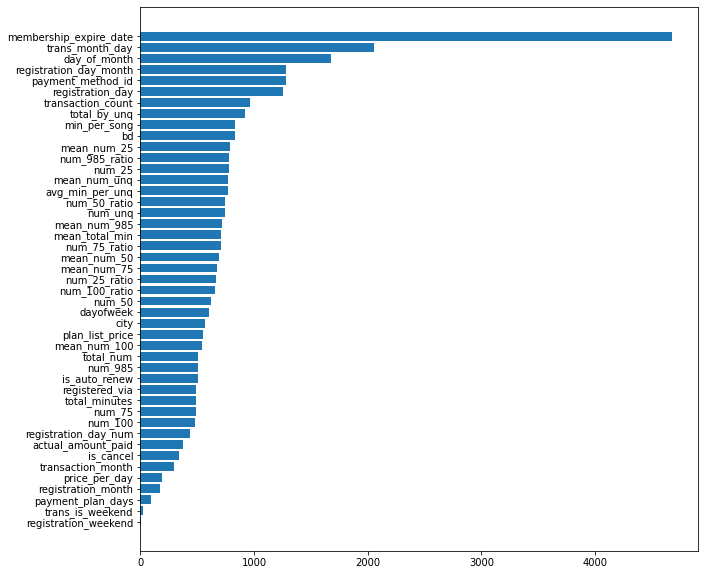

In [63]:
# plotting feature importance scores
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
feature_index = np.argsort(lgb.feature_importances_)
feature_imp = lgb.feature_importances_
feature_names = np.array(X.columns)
plt.barh(range(len(feature_imp)), feature_imp[feature_index])
plt.yticks(range(len(feature_imp)),feature_names[feature_index])
plt.show()

In [59]:
!pip3 install xgboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
start_1 = datetime.now()
xgb = XGBClassifier()
param_1 = {
    'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13],
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2,0.3,0.5,0.8,1],
    'subsample':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'n_estimators':[50,75,100,150,200,250,300,400,500,700,800],
}
random_clf_1 = RandomizedSearchCV(xgb, param_distributions=param_1, cv=5, verbose=1)

random_clf_1.fit(xtr,ytr)
best_param_1 = random_clf_1.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 248.0min finished


In [1]:
print("Best parameters:", best_param_1)

Best parameters: {'subsample': 0.9, 'n_estimators': 50, 'max_depth': 11, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

xgb = XGBClassifier(max_depth=11,
                    learning_rate=0.1,
                    n_estimators=50,
                    subsample=0.9,
                 colsample_bytree=0.8,
                 n_jobs=-1)
xgb.fit(xtr,ytr)
pred_train_1 = xgb.predict(xtr)
pred_test_1 = xgb.predict(xte)
print("Train accuracy = ",accuracy_score(ytr,pred_train_1))
print("Test accuracy = ",accuracy_score(yte,pred_test_1))
pred_train_prob_1 = xgb.predict_proba(xtr)
pred_test_prob_1 = xgb.predict_proba(xte)
print("Train loss prob= ",log_loss(ytr,pred_train_prob_1))
print("Test loss prob = ",log_loss(yte,pred_test_prob_1))

Train accuracy =  0.981292741204581
Test accuracy =  0.9769753645876246
Train loss prob=  0.05431361266340657
Test loss prob =  0.06306911460216229


In [10]:
def get_best_parameters(x,y):
    
    '''
    function to identify best parameters for LGBM Classifier using 
    RandomizedSearchCV
    '''
    
    lgb = LGBMClassifier(n_jobs=-1)
    param = {
               'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15],
               'learning_rate':
               [0.01,0.05,0.1,0.15,0.2,0.3,0.5,0.8,1],
               'subsample':[0.2,0.3,0.5,0.8,0.9,1],
               'colsample_bytree':
               [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
               'n_estimators':
               [50,100,150,200,250,300,400,500,700,800],
               'num_leaves':[31,35,40,45,50,55,60,70,80,90,100,200]
               }
    random_clf = RandomizedSearchCV(lgb, param_distributions=param,
                                    cv=10, verbose=1, n_jobs=-1)
    random_clf.fit(x,y)
    best_param = random_clf.best_params_
    
    return best_param

In [6]:
!pip install lightgbm

     |████████████████████████████████| 1.7 MB 3.4 MB/s eta 0:00:01


In [11]:
# training model
# LightGBM 1
from sklearn.metrics import accuracy_score, log_loss
from lightgbm import LGBMClassifier
from datetime import datetime 
from sklearn.model_selection import RandomizedSearchCV
    
print("LightGBM 1")
start_1 = datetime.now()
    
    # getting best parameters 
best_param_1 = get_best_parameters(xtr,ytr)
print("LGBMClassifier-1 best parameters:", best_param_1)
    
    # training LGBM-1 with best parameters identified
lgb1 = LGBMClassifier(max_depth=best_param_1['max_depth'],subsample=best_param_1['subsample'],
                 learning_rate=best_param_1['learning_rate'],n_estimators=best_param_1['n_estimators'],
                 num_leaves=best_param_1['num_leaves'],colsample_bytree=best_param_1['colsample_bytree'],n_jobs=-1)
lgb1.fit(xtr,ytr)

pred_train_1 = lgb1.predict(xtr)
pred_test_1 = lgb1.predict(xte)
print("Train accuracy of LGBM-1 = ",accuracy_score(ytr,pred_train_1))
print("Test accuracy of LGBM-1 = ",accuracy_score(yte,pred_test_1))
pred_train_prob_1 = lgb1.predict_proba(xtr)
pred_test_prob_1 = lgb1.predict_proba(xte)
print("Train loss of LGBM-1 = ",log_loss(ytr,pred_train_prob_1))
print("Test loss of LGBM-1 = ",log_loss(yte,pred_test_prob_1))
print("Time taken to train LightGBM Model-1 = ", (datetime.now() - start_1))
print("="*50)
    

LightGBM 1
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 30.1min finished


LGBMClassifier-1 best parameters: {'subsample': 0.5, 'num_leaves': 80, 'n_estimators': 250, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.4}
Train accuracy of LGBM-1 =  0.9833209744308039
Test accuracy of LGBM-1 =  0.9779599571558045
Train loss of LGBM-1 =  0.04256530626854273
Test loss of LGBM-1 =  0.055672319126092676
Time taken to train LightGBM Model-1 =  0:31:03.273449


In [12]:
# training 2nd LightGBM
    
print("LightGBM 2")
start_2 = datetime.now()
    
best_param_2 = get_best_parameters(xtr,ytr)
print("LGBMClassifier-2 best parameters:", best_param_2)
    
    # training LGBM-2 with best parameters identified
lgb2 = LGBMClassifier(max_depth=best_param_2['max_depth'],subsample=best_param_2['subsample'],
                     learning_rate=best_param_2['learning_rate'],n_estimators=best_param_2['n_estimators'],
                     num_leaves=best_param_2['num_leaves'],colsample_bytree=best_param_2['colsample_bytree'],n_jobs=-1)
lgb2.fit(xtr,ytr)
pred_train_2 = lgb2.predict(xtr)
pred_test_2 = lgb2.predict(xte)
print("Train accuracy of LGBM-2 = ",accuracy_score(ytr,pred_train_2))
print("Test accuracy of LGBM-2 = ",accuracy_score(yte,pred_test_2))
pred_train_prob_2 = lgb2.predict_proba(xtr)
pred_test_prob_2 = lgb2.predict_proba(xte)
print("Train loss of LGBM-2 = ",log_loss(ytr,pred_train_prob_2))
print("Test loss of LGBM-2 = ",log_loss(yte,pred_test_prob_2))
print("Time taken to train LightGBM Model-2 = ", (datetime.now() - start_2))
print("="*50)

LightGBM 2
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 32.1min finished


LGBMClassifier-2 best parameters: {'subsample': 0.9, 'num_leaves': 80, 'n_estimators': 150, 'max_depth': 12, 'learning_rate': 0.15, 'colsample_bytree': 1}
Train accuracy of LGBM-2 =  0.9828733075169591
Test accuracy of LGBM-2 =  0.9772596193458021
Train loss of LGBM-2 =  0.0466225343221508
Test loss of LGBM-2 =  0.06927708160770059
Time taken to train LightGBM Model-2 =  0:32:43.564536


In [13]:
#===================================================================
# training 3rd LightGBM
    
print("LightGBM 3")
start_3 = datetime.now()
    
best_param_3 = get_best_parameters(xtr,ytr)
print("LGBMClassifier-3 best parameters:", best_param_3)
# training LGBM-3 with best parameters identified
lgb3 = LGBMClassifier(max_depth=best_param_3['max_depth'],subsample=best_param_3['subsample'],
                 learning_rate=best_param_3['learning_rate'],n_estimators=best_param_3['n_estimators'],
                 num_leaves=best_param_3['num_leaves'],colsample_bytree=best_param_3['colsample_bytree'],n_jobs=-1)
lgb3.fit(xtr,ytr)
pred_train_3 = lgb3.predict(xtr)
pred_test_3 = lgb3.predict(xte)
print("Train accuracy of LGBM-3 = ",accuracy_score(ytr,pred_train_3))
print("Test accuracy of LGBM-3 = ",accuracy_score(yte,pred_test_3))
pred_train_prob_3 = lgb3.predict_proba(xtr)
pred_test_prob_3 = lgb3.predict_proba(xte)
print("Train loss of LGBM-3 = ",log_loss(ytr,pred_train_prob_3))
print("Test loss of LGBM-3 = ",log_loss(yte,pred_test_prob_3))
print("Time taken to train LightGBM Model-3 = ", (datetime.now() - start_3))
print("="*50)
    
  

LightGBM 3
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 35.7min finished


LGBMClassifier-3 best parameters: {'subsample': 1, 'num_leaves': 200, 'n_estimators': 700, 'max_depth': 15, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
Train accuracy of LGBM-3 =  0.9934333031226827
Test accuracy of LGBM-3 =  0.978380159841806
Train loss of LGBM-3 =  0.023848426312121786
Test loss of LGBM-3 =  0.0519194635422523
Time taken to train LightGBM Model-3 =  0:39:18.455942


In [18]:
def onehot(col):
    '''
    function for one-hot encoding of class-label y
    '''
    col = list(col)
    arr = np.zeros((len(col),2))
    for i,val in enumerate(col):
        arr[i,val] = 1
    return arr

In [19]:
import numpy as np
pred_train = np.hstack([pred_train_prob_1,
                        pred_train_prob_2,
                        pred_train_prob_3])

pred_test = np.hstack([pred_test_prob_1,
                       pred_test_prob_2,
                       pred_test_prob_3])


In [20]:
  #==================================================================
    
# preparing train data for Feed Forward Neural Network (FFNN)

# combining the predicted probababilities of three LGBM models
  #for training FFNN
import numpy as np
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import tensorflow
from keras.callbacks import ModelCheckpoint



print("Shape of predicted train probabilities",pred_train.shape)
print("Shape of predicted test probabilities",pred_test.shape)
    
# one-hot encoding class label for Neural Network 
ytrain_ohe = onehot(ytr)
ytest_ohe = onehot(yte)
    
# defining architecture for FFNN
# Neural network on the probabilities of LGBM Classifiers
model_nn = Sequential()
model_nn.add(Dense(64,activation='sigmoid',input_shape=(6,)))
model_nn.add(Dropout(0.7))
model_nn.add(Dense(32,activation='sigmoid'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(6,activation='sigmoid'))
model_nn.add(Dropout(0.3))
model_nn.add(Dense(2,activation='softmax'))
opt = tensorflow.keras.optimizers.Adam(0.0001)
model_nn.compile(optimizer=opt,loss='binary_crossentropy',
                 metrics=['accuracy'])
model_nn.summary()



Shape of predicted train probabilities (728220, 6)
Shape of predicted test probabilities (242740, 6)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                448       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 198       
_________________________________________________________________
dropout_8 (Dropout)          (None, 6)                 0         
___________________

In [21]:
#checkpoint to save best weights of model
# checkpt = ModelCheckpoint("best_weights.h5",monitor='val_loss',
#                     save_best_only=True,save_weights_only=True,
#                     mode='min', save_freq='epoch')
model_nn.fit(pred_train,ytrain_ohe,batch_size=256, 
             epochs=25,
             validation_data=(pred_test,ytest_ohe),
             verbose=2)



Epoch 1/25
2845/2845 - 15s - loss: 0.4592 - accuracy: 0.8139 - val_loss: 0.3027 - val_accuracy: 0.9101
Epoch 2/25
2845/2845 - 12s - loss: 0.2882 - accuracy: 0.9141 - val_loss: 0.1379 - val_accuracy: 0.9581
Epoch 3/25
2845/2845 - 12s - loss: 0.1204 - accuracy: 0.9664 - val_loss: 0.0762 - val_accuracy: 0.9784
Epoch 4/25
2845/2845 - 12s - loss: 0.0794 - accuracy: 0.9787 - val_loss: 0.0762 - val_accuracy: 0.9783
Epoch 5/25
2845/2845 - 13s - loss: 0.0696 - accuracy: 0.9816 - val_loss: 0.0769 - val_accuracy: 0.9783
Epoch 6/25
2845/2845 - 12s - loss: 0.0648 - accuracy: 0.9829 - val_loss: 0.0766 - val_accuracy: 0.9784
Epoch 7/25
2845/2845 - 12s - loss: 0.0603 - accuracy: 0.9839 - val_loss: 0.0773 - val_accuracy: 0.9783
Epoch 8/25
2845/2845 - 12s - loss: 0.0570 - accuracy: 0.9845 - val_loss: 0.0773 - val_accuracy: 0.9784
Epoch 9/25
2845/2845 - 12s - loss: 0.0548 - accuracy: 0.9849 - val_loss: 0.0775 - val_accuracy: 0.9784
Epoch 10/25
2845/2845 - 12s - loss: 0.0525 - accuracy: 0.9853 - val_loss:

In [22]:
train_pred_prob_nn = model_nn.predict(pred_train)
train_pred_nn = [np.argmax(train_pred_prob_nn[i]) for i in
                 range(pred_train.shape[0])]
print("Final accuracy on train data = ",  
accuracy_score(ytr,train_pred_nn))
print("Final loss on train data = ",
log_loss(ytr,train_pred_prob_nn))

# predicting on test data
test_pred_prob_nn = model_nn.predict(pred_test)
test_pred_nn = [np.argmax(test_pred_prob_nn[i]) for i in
                range(pred_test.shape[0])]
print("Final accuracy on test data = ",
accuracy_score(yte,test_pred_nn))
print("Final loss on test data = ",
log_loss(yte,test_pred_prob_nn))

print("Model training completed")
    

Final accuracy on train data =  0.9944151492680783
Final loss on train data =  0.01711189394469829
Final accuracy on test data =  0.9782112548405701
Final loss on test data =  0.09931468118807167
Model training completed


In [37]:
import py7zr
archive = py7zr.SevenZipFile(f"/home/saiteja_kandra/sample_submission_v2.csv.7z", mode='r')
archive.extractall(path='/home/saiteja_kandra')


In [14]:
test_data=pd.read_csv('/home/saiteja_kandra/data/churn_comp_refresh/sample_submission_v2.csv')
test_data.head()

,msno,is_churn
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0


In [39]:
test_data.is_churn.value_counts()

0    907471
Name: is_churn, dtype: int64

In [43]:
#count number of transactions per user
transaction_count_per_user = transactions_data.groupby('msno')['msno'].count()

transaction_count_df = pd.DataFrame(transaction_count_per_user)
transaction_count_df.columns =['transaction_count'] #adding the column
transaction_count_df.reset_index(inplace=True) # this will set the index properly
transactions_data= transaction_count_df.merge(transactions_data,on='msno')
transactions_data.head()

,msno,transaction_count,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,1,22,395,1599,1599,0,20161023,20180206,0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1,41,30,99,99,1,20170315,20170415,0
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,2,39,30,149,149,1,20170331,20170519,0
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,2,39,30,149,149,1,20170228,20170419,0
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1,41,30,149,149,1,20170326,20170426,0


In [44]:
# merging test labels with transactions dataframe
test = test_data.merge(transactions_data,how='left',on='msno')
test.head()

,msno,is_churn,transaction_count,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1.0,41.0,30.0,99.0,99.0,1.0,20170318.0,20170418.0,0.0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,1.0,34.0,30.0,149.0,149.0,1.0,20170331.0,20170430.0,0.0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,1.0,41.0,30.0,99.0,99.0,1.0,20170315.0,20170415.0,0.0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1.0,41.0,30.0,99.0,99.0,1.0,20170327.0,20170427.0,0.0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,1.0,30.0,30.0,129.0,129.0,1.0,20170322.0,20170421.0,0.0


In [ ]:
test.is_churn.value_counts()

0    973285
Name: is_churn, dtype: int64

In [49]:
test=test.merge(members_v3,how='left',on='msno')

In [50]:
test.shape

(973285, 15)

In [58]:
 final_test= test.merge(final_logs_data, how='left',on='msno')

In [59]:
final_test.head()
 

,msno,is_churn,transaction_count,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,...,mean_num_100,mean_num_unq,mean_total_min,num_25,num_50,num_75,num_985,num_100,num_unq,total_minutes
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1.0,41.0,30.0,99.0,99.0,1.0,20170318.0,20170418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,1.0,34.0,30.0,149.0,149.0,1.0,20170331.0,20170430.0,...,54.870968,73.322581,269.248731,550.0,176.0,125.0,131.0,1701.0,2273.0,8346.710667
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,1.0,41.0,30.0,99.0,99.0,1.0,20170315.0,20170415.0,...,8.400000,14.900000,39.690450,79.0,19.0,1.0,2.0,84.0,149.0,396.904500
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1.0,41.0,30.0,99.0,99.0,1.0,20170327.0,20170427.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,1.0,30.0,30.0,129.0,129.0,1.0,20170322.0,20170421.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#remove the duplicates if any
final_test= final_test.drop_duplicates(subset= ['msno'], keep='first')
final_test.shape

(907471, 29)

In [61]:
final_test.isna().sum()/final_test.shape[0]

msno                      0.000000
is_churn                  0.000000
transaction_count         0.000001
payment_method_id         0.000001
payment_plan_days         0.000001
plan_list_price           0.000001
actual_amount_paid        0.000001
is_auto_renew             0.000001
transaction_date          0.000001
membership_expire_date    0.000001
is_cancel                 0.000001
city                      0.123840
bd                        0.123840
registered_via            0.123840
registration_init_time    0.123840
mean_num_25               0.228373
mean_num_50               0.228373
mean_num_75               0.228373
mean_num_985              0.228373
mean_num_100              0.228373
mean_num_unq              0.228373
mean_total_min            0.228373
num_25                    0.228373
num_50                    0.228373
num_75                    0.228373
num_985                   0.228373
num_100                   0.228373
num_unq                   0.228373
total_minutes       

In [66]:
#fill the missing values
import numpy as np
median_data = median(final_test,numerical_columns)
mode_data= mode(final_test,categorical_columns)
for column in numerical_columns:
    
    final_test[column].fillna(median_data[column],inplace=True)
for column in categorical_columns:
    final_test[column].fillna(mode_data[column],inplace=True)

In [67]:
final_test.isna().sum()

msno                      0
is_churn                  0
transaction_count         0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
city                      0
bd                        0
registered_via            0
registration_init_time    0
mean_num_25               0
mean_num_50               0
mean_num_75               0
mean_num_985              0
mean_num_100              0
mean_num_unq              0
mean_total_min            0
num_25                    0
num_50                    0
num_75                    0
num_985                   0
num_100                   0
num_unq                   0
total_minutes             0
dtype: int64

In [ ]:
#fill with mean and median

In [68]:
from datetime import datetime

final_test['day_of_month']=final_test.transaction_date.apply(lambda x:
                    np.int8(str(int(x))[6:]))

final_test['transaction_month'] =final_test.transaction_date.apply(lambda x: np.int8(str(int(x))[4:6]))

final_test['dayofweek'] =final_test.transaction_date.apply(lambda x: datetime.strptime(str(int(x)), "%Y%m%d").isoweekday())

final_test['trans_is_weekend'] = final_test.dayofweek.map(lambda x:1 if x in (6,7) else 0)
final_test['trans_month_day'] = final_test.transaction_date.apply(lambda x: np.int16(str(int(x))[4:]))

In [69]:
final_test['registration_day']=final_test.registration_init_time.apply(lambda x: np.int8(str(int(x))[6:] ))
final_test['registration_month']=final_test.registration_init_time.apply(lambda x: np.int8(str(int(x))[4:6]))
final_test['registration_day_month']=final_test.registration_init_time.apply(lambda x: np.int16(str(int(x))[4:]))
final_test['registration_day_num'] =final_test.registration_init_time.apply(lambda x:datetime.strptime(str(int(x)), "%Y%m%d").isoweekday())
final_test['registration_weekend']=final_test.registration_day_num.map(lambda x: 1 if x in (6,7) else 0)
final_test['price_per_day'] = final_test['plan_list_price']/final_test['payment_plan_days']

In [70]:
#creating ratio features i.e number of songs that are 25% of their length  out of total number of songs listened
# creating a feature 'total_num' i.e. total number of songs listened by the user
final_test['min_per_song'] = final_test['total_minutes']/(final_test['num_25']+final_test['num_50']+final_test['num_75']+final_test['num_985']+final_test['num_100'])
final_test['total_num'] = final_test['num_25']+final_test['num_50']+final_test['num_75']+final_test['num_985']+final_test['num_100']
final_test['num_25_ratio'] = final_test['num_25']/final_test['total_num']
final_test['num_50_ratio'] = final_test['num_50']/final_test['total_num']
final_test['num_75_ratio'] = final_test['num_75']/final_test['total_num']
final_test['num_985_ratio'] =final_test['num_985']/final_test['total_num']
final_test['num_100_ratio'] =final_test['num_100']/final_test['total_num']
final_test['avg_min_per_unq'] = final_test['mean_total_min']/final_test['mean_num_unq']
final_test['total_by_unq'] = final_test['total_num']/final_test['num_unq']

In [71]:
final_test.head()

,msno,is_churn,transaction_count,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,...,price_per_day,min_per_song,total_num,num_25_ratio,num_50_ratio,num_75_ratio,num_985_ratio,num_100_ratio,avg_min_per_unq,total_by_unq
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1.0,41.0,30.0,99.0,99.0,1.0,20170318.0,20170418.0,...,3.300000,3.479923,385.0,0.145455,0.036364,0.023377,0.025974,0.768831,4.062504,1.191950
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,1.0,34.0,30.0,149.0,149.0,1.0,20170331.0,20170430.0,...,4.966667,3.110962,2683.0,0.204994,0.065598,0.046590,0.048826,0.633992,3.672112,1.180378
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,1.0,41.0,30.0,99.0,99.0,1.0,20170315.0,20170415.0,...,3.300000,2.145430,185.0,0.427027,0.102703,0.005405,0.010811,0.454054,2.663789,1.241611
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1.0,41.0,30.0,99.0,99.0,1.0,20170327.0,20170427.0,...,3.300000,3.479923,385.0,0.145455,0.036364,0.023377,0.025974,0.768831,4.062504,1.191950
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,1.0,30.0,30.0,129.0,129.0,1.0,20170322.0,20170421.0,...,4.300000,3.479923,385.0,0.145455,0.036364,0.023377,0.025974,0.768831,4.062504,1.191950


In [80]:
final_test.shape

(907471, 49)

In [76]:
final_test.to_pickle('/home/saiteja_kandra/test_final_49.pkl')

In [12]:
import pandas as pd
test_data= pd.read_pickle('/home/saiteja_kandra/test_final_49.pkl')

In [13]:
y_test=test_data['is_churn']
x_test=test_data.drop(columns=['msno','is_churn','transaction_date','registration_init_time'],axis=1)
(x_test.shape),(y_test.shape)

((907471, 45), (907471,))

In [26]:
#kaggle test prediction for logisticregression
from sklearn.metrics import accuracy_score, log_loss
ytest_pred = calibrated.predict(x_test)
print("Test Accuracy = ",accuracy_score(y_test,ytest_pred))

# log-loss on test dataset

yte_pred_prob = calibrated.predict_proba(x_test)
print("Test Loss = ",log_loss(y_test,yte_pred_prob,labels=[0,1]))

Test Accuracy =  1.0
Test Loss =  0.08362860923224279


In [27]:
#kaggle test prediction for logisticregression
churn_prob = [p[1] for p in yte_pred_prob]
submission = pd.DataFrame()
submission['msno'] = test_data['msno']
submission['is_churn'] = churn_prob
submission.to_csv("/home/saiteja_kandra/submission_test.csv",index=False)

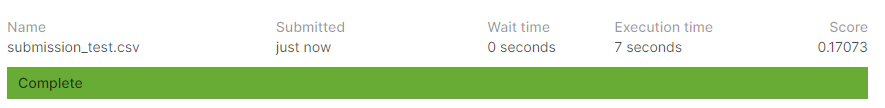

In [53]:
#kaggle test prediction for svm
from sklearn.metrics import accuracy_score, log_loss
ytest_pred = calibrated.predict(x_test)
print("Test Accuracy = ",accuracy_score(y_test,ytest_pred))

# log-loss on test dataset

yte_pred_prob = calibrated.predict_proba(x_test)
print("Test Loss = ",log_loss(y_test,yte_pred_prob,labels=[0,1]))

Test Accuracy =  1.0
Test Loss =  0.09425228276854082


In [54]:
#kaggle test prediction for svm
churn_prob = [p[1] for p in yte_pred_prob]
submission = pd.DataFrame()
submission['msno'] = test_data['msno']
submission['is_churn'] = churn_prob
submission.to_csv("/home/saiteja_kandra/submission_test.csv",index=False)

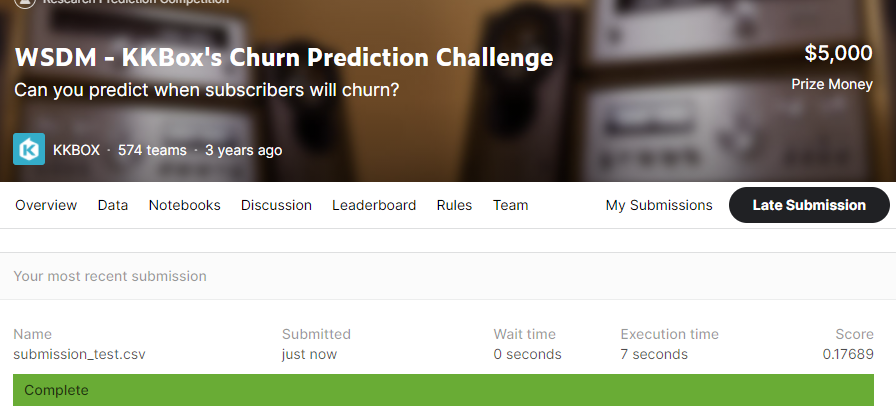

In [29]:
#kaggle test prediction for xgboost
from sklearn.metrics import accuracy_score, log_loss
ytest_pred = xgb.predict(x_test)
print("Test Accuracy = ",accuracy_score(y_test,ytest_pred))

# log-loss on test dataset

yte_pred_prob = xgb.predict_proba(x_test)
print("Test Loss = ",log_loss(y_test,yte_pred_prob,labels=[0,1]))

Test Accuracy =  0.9664341890815243
Test Loss =  0.11059983310027606


In [30]:
#kaggle test prediction for xgboost
churn_prob = [p[1] for p in yte_pred_prob]
submission = pd.DataFrame()
submission['msno'] = test_data['msno']
submission['is_churn'] = churn_prob
submission.to_csv("/home/saiteja_kandra/submission_test.csv",index=False)

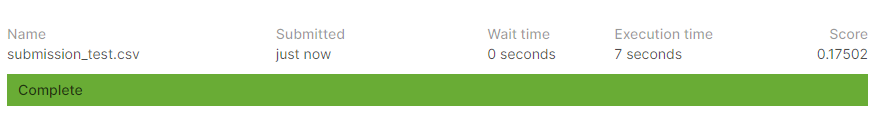

In [39]:
#kaggle test prediction for light gb
from sklearn.metrics import accuracy_score, log_loss
ytest_pred = lgb2.predict(x_test)
print("Test Accuracy = ",accuracy_score(y_test,ytest_pred))

# log-loss on test dataset

yte_pred_prob = lgb2.predict_proba(x_test)
print("Test Loss = ",log_loss(y_test,yte_pred_prob,labels=[0,1]))

Test Accuracy =  0.9625751125931297
Test Loss =  0.16461802964441394


In [17]:
#kaggle test prediction for light gb
churn_prob = [p[1] for p in yte_pred_prob]
submission = pd.DataFrame()
submission['msno'] = test_data['msno']
submission['is_churn'] = churn_prob
submission.to_csv("/home/saiteja_kandra/submission_test.csv",index=False)

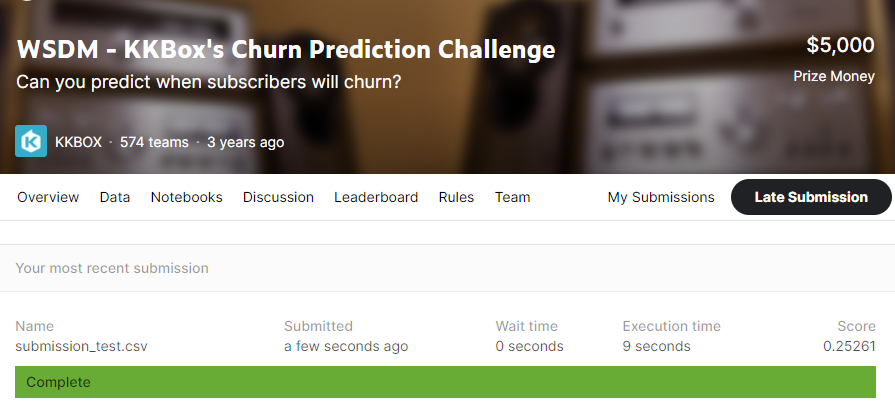

In [48]:
#kaggle test prediction for RandomForest
from sklearn.metrics import accuracy_score, log_loss
ytest_pred = algo.predict(x_test)
print("Test Accuracy = ",accuracy_score(y_test,ytest_pred))

# log-loss on test dataset RandomForest

yte_pred_prob = algo.predict_proba(x_test)
print("Test Loss = ",log_loss(y_test,yte_pred_prob,labels=[0,1]))

Test Accuracy =  0.9611557834906019
Test Loss =  0.10262752884879006


In [49]:
#kaggle test prediction for RandomForest
churn_prob = [p[1] for p in yte_pred_prob]
submission = pd.DataFrame()
submission['msno'] = test_data['msno']
submission['is_churn'] = churn_prob
submission.to_csv("/home/saiteja_kandra/submission_test.csv",index=False)

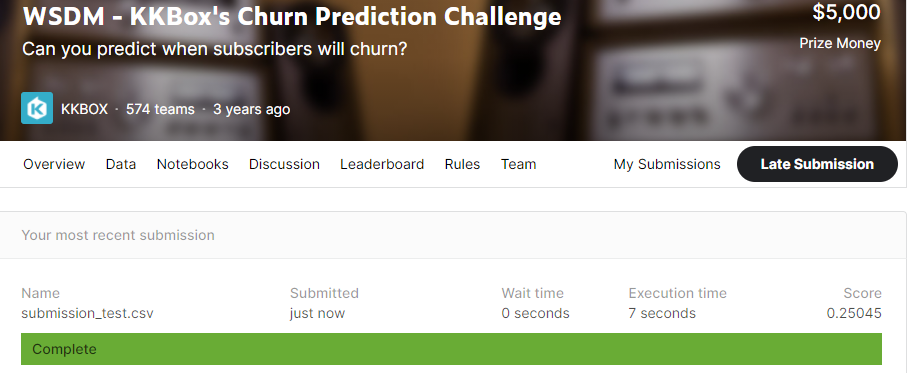

In [ ]:
#kaggle test prediction for lgb
from sklearn.metrics import accuracy_score, log_loss
ytest_pred = algo.predict(x_test)
print("Test Accuracy = ",accuracy_score(y_test,ytest_pred))

# log-loss on test dataset RandomForest

yte_pred_prob = algo.predict_proba(x_test)
print("Test Loss = ",log_loss(y_test,yte_pred_prob,labels=[0,1]))

In [ ]:
#kaggle test prediction for lgb
churn_prob = [p[1] for p in yte_pred_prob]
submission = pd.DataFrame()
submission['msno'] = test_data['msno']
submission['is_churn'] = churn_prob
submission.to_csv("/home/saiteja_kandra/submission_test.csv",index=False)

In [23]:
pred_test_prob_1 = lgb1.predict_proba(x_test)

In [24]:
pred_test_prob_2 = lgb2.predict_proba(x_test)

In [25]:
pred_test_prob_3 = lgb3.predict_proba(x_test)

In [26]:
test_x_nn = np.hstack([pred_test_prob_1,pred_test_prob_2,pred_test_prob_3])

In [29]:
test_x_nn.shape

(907471, 6)

In [89]:
os.getcwd()

'/home/saiteja_kandra'

In [41]:
# one-hot encoding class-label 
# test_y_ohe = onehot(test_y)
    
# predicting is_churn
test_pred_prob_nn = model_nn.predict(test_x_nn)
test_pred_nn = [np.argmax(test_pred_prob_nn[i]) for i in range(test_x_nn.shape[0])]
print("Accuracy = ", accuracy_score(y_test,test_pred_nn))
print("Loss = ", log_loss(y_test,test_pred_prob_nn,labels=[0,1]))

# taking out probabilities of class '1' i.e. churn
churn_prob = [p[1] for p in test_pred_prob_nn]
    
# saving predicted probabilities in a csv file
submission = pd.DataFrame()
submission['msno'] = test_data['msno']
submission['is_churn'] = churn_prob
submission.to_csv("/home/saiteja_kandra/submission_test.csv",index=False)
submission['is_churn_class'] = test_pred_nn
submission.to_csv("/home/saiteja_kandra/submission_test_class.csv",index=False)

Accuracy =  0.9612946309028058
Loss =  0.0961515100486326


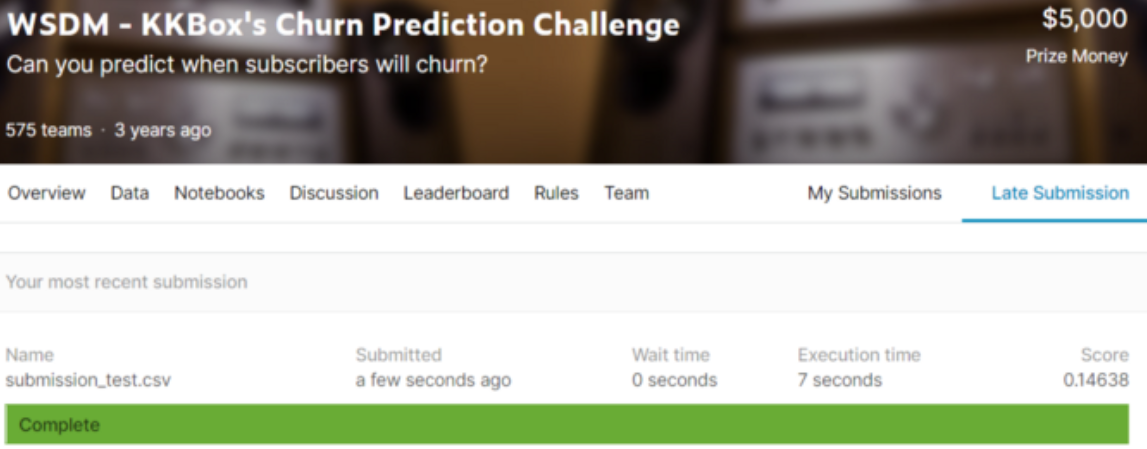

In [18]:
#kaggle score test logloss 
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "loss"]
x.add_row(["custom ensemble", 2.10 ])

x.add_row(["Logistic regression", 0.170 ])
x.add_row(["SVM", 0.1768 ])
x.add_row(["Xgboost", 0.1750 ])
x.add_row(["light lgb", 0.2526])
x.add_row(["Random forest", 0.250 ])
x.add_row(["3 lgb + nueral net", 0.146])
x.add_row(["custom ensemble", 0.9])
print(x)


+---------------------+--------+
|        Model        |  loss  |
+---------------------+--------+
|   custom ensemble   |  2.1   |
| Logistic regression |  0.17  |
|         SVM         | 0.1768 |
|       Xgboost       | 0.175  |
|      light lgb      | 0.2526 |
|    Random forest    |  0.25  |
|  3 lgb + nueral net | 0.146  |
|   custom ensemble   |  0.9   |
+---------------------+--------+


In [ ]:
#from  the above we can say that nueral model gave pretty much better score than the ensemble models, i have tried the emsemble procedure 
#but the score written by kaggle was not as good as the simple logistic regression
#nueral net model score written is less than top 10%, so i stopped analizing furthur